<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Primer Ejemplo de Notebook
#### Autor: *Nahu Fiasche*


### Introducción

Jupyter Notebook es una herramienta para la confección de reportes técnicos, dado que permite la interacción en el mismo ambiente de: 

1. un procesador de texto elemental (formato Markdown) que permite resaltar texto, en forma de *itálica* o **negrita** de manera muy legible. Esto quiere decir que para poner algo en itálica, tenés que poner la palabra \* *entre asteriscos* \*. Si hacés doble click sobre el texto, verás el código fuente de esto que estás leyendo. Una palabra en \*\* **negrita** \*\* la tenés que poner entre asteriscos dobles. Te sugiero que revises todas las celdas de texto de este documento, especialmente la celda de cabecera. Luego para que se vuelva a interpretar podés tocar CTRL+ENTER, y se volverá a ver de forma más agradable. 

Yendo a lo concreto, tendrás que escribir en un lenguaje que se llama **Markdown**, y que no tiene muchas novedades, salvo que es *interpretado*. 

Luego verás que el código es muy legible, a pesar de no haber sido interpretado. 


Cuenta con estilos predefinidos:

# Título 1
## Título 2
### Título 3

y también la capacidad de incluir enlaces a otras páginas, como por ejemplo [esta página](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) donde encontrarás más funcionalidades del lenguaje **Markdown**. Otra capacidad que tienen los notebooks es la de **incrustar PDFs**, donde por ejemplo podrías incorporar las soluciones de lápiz y papel que se te pidan. Más abajo encontrarás un ejemplo de esto.

2. capacidad para incluir lenguaje matemático estilo LaTex, tanto de forma presentada

\begin{equation}
H(s) = \frac{\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}

como *inline* en el propio párrafo $y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right) $

3. La posibilidad de incluir scripts en Python, como los que usaremos para las simulaciones en los TPs de la materia. En este caso usaremos el *demo_seg_orden1.py* como ejemplo. Una vez que lo probamos y estamos seguros que funciona de forma esperada en *Spyder*, podemos incluir los resultados de la simulación de manera casi transparente. Solo tenemos que agregar una celda de código donde incluimos el código, y los resultados directamente quedan incluidos en este documento.


Espero que a esta altura valores comenzar a usar estos *notebooks*. Estoy seguro que será una herramienta que adoptarás y muy posiblemente no vuelvas a usar un editor de texto (salvo que te veas obligado).


Te invito a que revises el código fuente de este documento que encontrarás los típicos ejemplos que necesitarás para la presentación de tareas y trabajos. Fijate la celda cabecera de este documento y verás cómo se pueden incrustar imágenes.



Podés incorporar tantas *celdas* como necesites. Las celdas pueden contenter *Markdon* o directamente código fuente de *Python*.

La siguiente celda es una celda de texto que incorpora diferentes tipos de lenguaje matemático. Esas ecuaciones se formatean usando un lenguaje llamado $\LaTeX$. De hecho, poner texto entre el *signo pesos (\\$)* le indica a Markdown que use el intérprete $\LaTeX$ en dicha parte del texto $\to$ \\$ esto_se_interpreta_como_un_comando_LaTeX \\$

### Un ejemplo para mostrarte lo que podrías hacer

Entendemos como sección de segundo orden [...] de orden arbitrario.

Para el caso concreto de un filtro  [...] nos permitió obtener una función $H(s)$ en función de dos parámetros $\omega_0$ y $Q$. La siguiente ecuación se llama *presentada*)

\begin{equation}
H(s) = \frac{\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}

 Luego adoptando como norma de frecuencia $\omega_0$, obtenemos la versión normalizada en frecuencia

\begin{equation}
H(s) = \frac{1}{s^2+s\frac{1}{Q}+1}
\end{equation}

quedando como único parámetro $Q$. En la siguiente simulación se ejemplifica cómo simular una SOS, obteniendo la respuesta en frecuencia y un diagrama de polos y ceros. En éste párrafo incluimos ecuaciones *inline*, o en el propio párrafo con tan solo encerrar con el signo \\$  los comandos de $\LaTeX$ $y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right) $




La siguiente celda será de Código, fijate que cuando accedas al fuente, verás que donde decía *Markdown*, ahora dice *Code* (fijate en la barra de herramientas un menú desplegable).

In [1]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

In [2]:

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})


Ahora podés volver a intercalar texto libremente, por ejemplo para explicar que el bloque anterior se encarga de cargar funciones y módulos y que lo podés hacer **solamente una vez al principio, o donde lo necesites**. A partir de acá podés intercalar tu código o tantas celdas de texto como necesites. Por ejemplo, comenzaremos con un manuscrito escaneado, donde por ejemplo, podrías incluir la resolución de un problema que se te pida en clase:

In [3]:
from IPython.display import IFrame
IFrame("./sos_pb_lapiz.pdf", width=1000, height=1000)


A partir de este punto podés incluir las simulaciones en Python y LTspice, en ese orden.

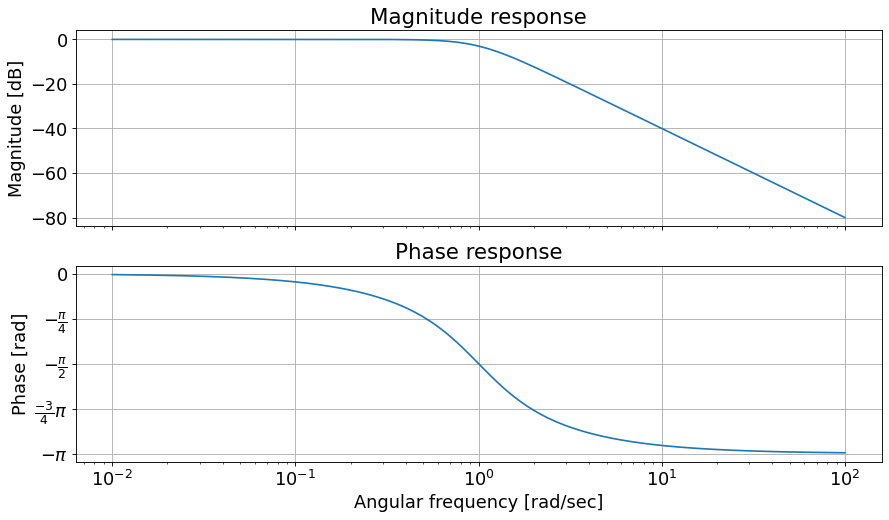

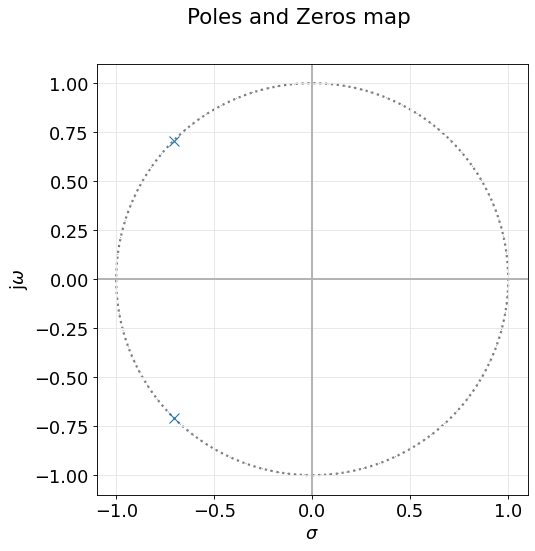

In [4]:
     
# Definimos los parámetros de la simulación

# Probar diferentes valores de Q
#################################

#Q = 1/3           # sobreamortiguado
#Q = 1/2  # amortiguamiento crítico  (son definiciones de T. de control)
Q = np.sqrt(2)/2             # subamortiguado

# Luego de analizar diferentes Q, probar desnormalizar
######################################################
w0 = 1

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

H1 = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H1)

plt.show()


Fijate que el código de más arriba genera resultados y los muestra incorporados a éste documento. Por supuesto que tiene la posibilidad de recalcular dichos resultados, re-interpretarlos y regenerar las mismas figuras para otros valores de parámetros, sin hacer ni un solo copy paste. **Esa es una de las grandes ventajas de éstos notebooks**.

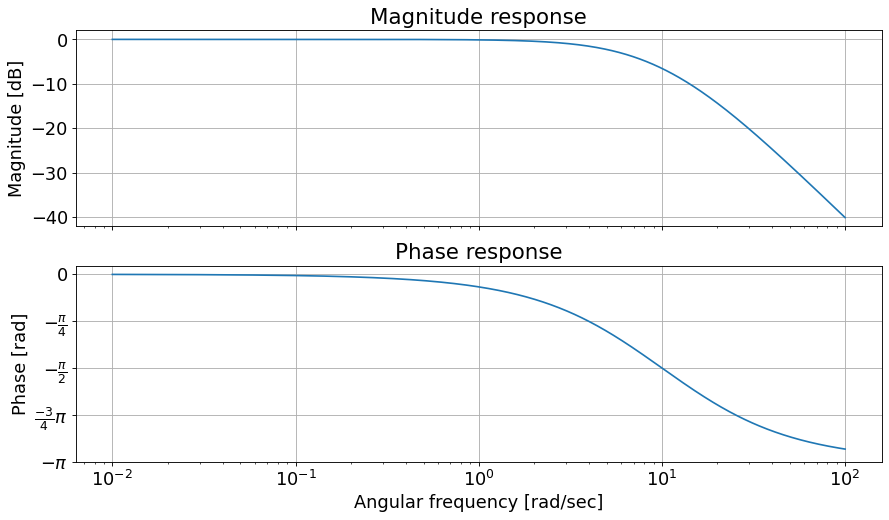

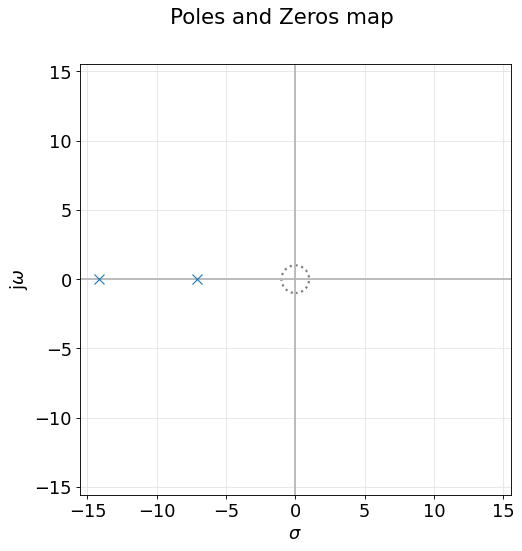

In [9]:
     
# Definimos los parámetros de la simulación

# Probar diferentes valores de Q
#################################

#Q = 1/3           # sobreamortiguado
#Q = 1/2  # amortiguamiento crítico  (son definiciones de T. de control)
Q = np.sqrt(2)/3             # subamortiguado

# Luego de analizar diferentes Q, probar desnormalizar
######################################################
w0 = 10

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

H1 = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H1)

plt.show()


y listo ... el resto lo irás aprendiendo durante el año ... Ah! **una última cosa importante**, estos documentos los podés ver muy bien desde cualquier parte, un celu, una compu, etc. Y obviamente compartirlos con quien vos quieras, en tu CV, a un compañero, o a las y los profes. Solo tenés que compartir el enlace *proyectado* via [nbviewer](https://nbviewer.org). Esto es tan sencillo como copiar y pegar la dirección de [tu notebook](https://github.com/marianux/tc2/blob/main/tu_primer_notebook.ipynb) en Github (ojo! en tu repo personal, este es el enlace a este mismo documento en el mío) en el proyector (o renderizador) de [nbviewer](https://nbviewer.org). El link que resulta luego de tocar el botón es el que podés compartir, y que para este mismo documento te lo dejo a continuación para que compares como lo renderiza [Github](https://github.com/marianux/tc2/blob/main/tu_primer_notebook.ipynb) y [nbviewer](https://nbviewer.org/github/marianux/tc2/blob/main/tu_primer_notebook.ipynb). Yo prefiero siempre los de **nbviewer**, aunque podés mandarme **el que te guste a vos**.

Si te quedaste con ganas de aprender más:

* [sobre Markdown y LaTeX](https://ashki23.github.io/markdown-latex.html)

* [sobre Jupyter notebooks](https://jupyter.org/try)

* [Si ya usaste Matlab ...](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)

* Podés continuar con tu segundo notebook [un pasabajos simple](SOS_pasabajo.ipynb)
